In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import statsmodels.api as sm
import datetime

In [10]:
# Load the data
data = pd.read_csv("D:/Kifya/week1/Data/raw_analyst_ratings.csv/raw_analyst_ratings.csv")  

In [11]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,6/5/2020 4:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,6/3/2020 4:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,5/26/2020 4:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,5/22/2020 4:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,5/22/2020 4:00,A


            ##Descriptive_Statistics

In [12]:
# Handle missing values (adjust as needed)
data.dropna(subset=['headline'], inplace=True)  # Remove rows with missing headlines

In [13]:
# Descriptive Statistics
headline_lengths = data['headline'].str.len()
print("Headline Length Statistics:")
print(headline_lengths.describe())

Headline Length Statistics:
count    1.048575e+06
mean     7.300076e+01
std      4.029646e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64


In [14]:
print(data.describe())

         Unnamed: 0
count  1.048575e+06
mean   5.270714e+05
std    3.041128e+05
min    0.000000e+00
25%    2.637275e+05
50%    5.270880e+05
75%    7.903815e+05
max    1.053772e+06


                ###Text Analysis(Sentiment Analysis & Topic Modeling)

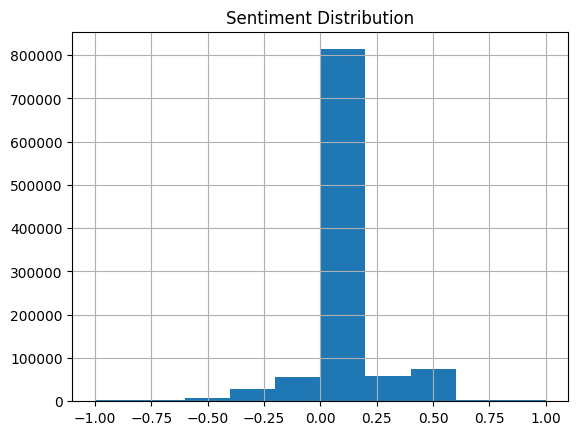

In [15]:
# Sentiment Analysis
data['sentiment'] = data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_distribution = data['sentiment'].hist()
plt.title('Sentiment Distribution')
plt.show()


Dataset Mean Sentiment: 0.05004633734037076
Difference from Baseline: 0.05004633734037076


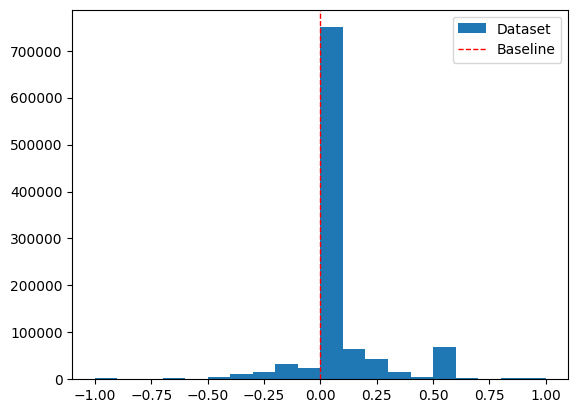

In [16]:
# compare the dataset sentiment distribution using various methods:
baseline_mean = 0  # Neutral sentiment baseline

dataset_mean = data['sentiment'].mean()

print("Dataset Mean Sentiment:", dataset_mean)
print("Difference from Baseline:", dataset_mean - baseline_mean)

# Visualize distributions (optional)
plt.hist(data['sentiment'], bins=20, label='Dataset')
plt.axvline(baseline_mean, color='red', linestyle='dashed', linewidth=1, label='Baseline')
plt.legend()
plt.show()

In [17]:
data['date'] = pd.to_datetime(data['date'], format='mixed', utc=True)

#####Time Series Analysis

In [18]:
# Time Series Analysis
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

daily_counts = data.resample('D').size()
print("Daily Publication Frequency:")
print(daily_counts)

Daily Publication Frequency:
date
2009-02-14 00:00:00+00:00      1
2009-02-15 00:00:00+00:00      0
2009-02-16 00:00:00+00:00      0
2009-02-17 00:00:00+00:00      0
2009-02-18 00:00:00+00:00      0
                            ... 
2020-06-07 00:00:00+00:00     18
2020-06-08 00:00:00+00:00    564
2020-06-09 00:00:00+00:00    580
2020-06-10 00:00:00+00:00    553
2020-06-11 00:00:00+00:00    302
Freq: D, Length: 4136, dtype: int64


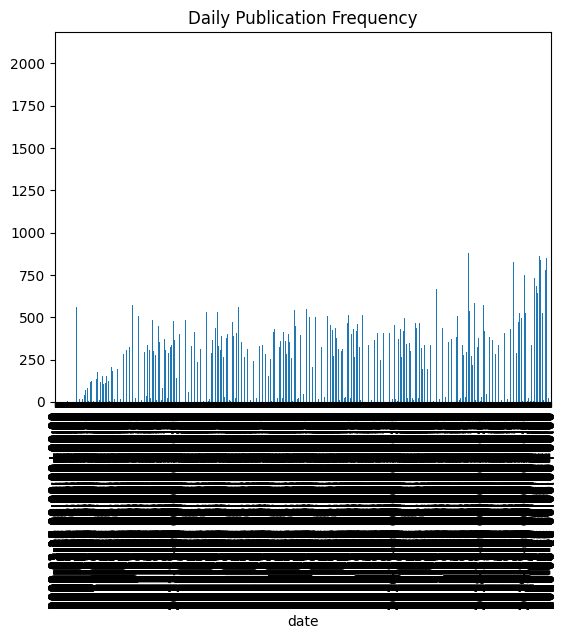

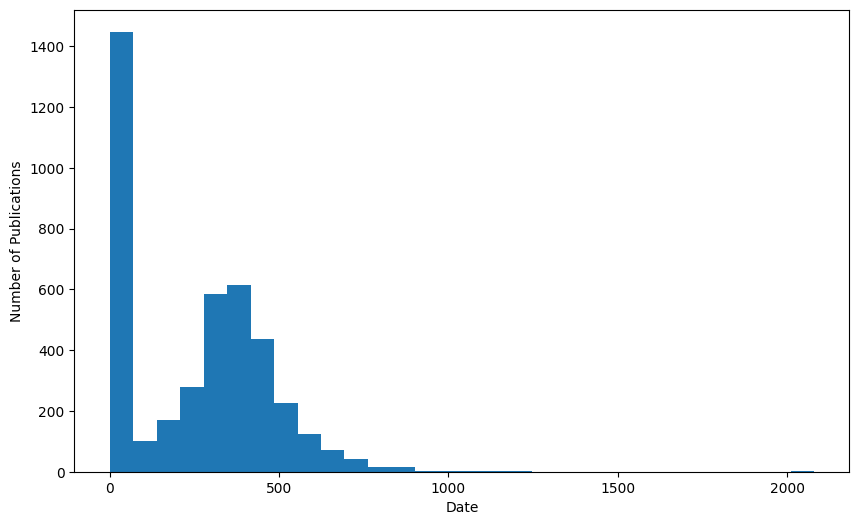

In [19]:
#Create a histogram or bar plot to visualize the distribution of daily publication counts. This can help identify common patterns and outliers.
daily_counts.plot(kind='bar', title='Daily Publication Frequency')
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.hist(daily_counts, bins=30)
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.show()

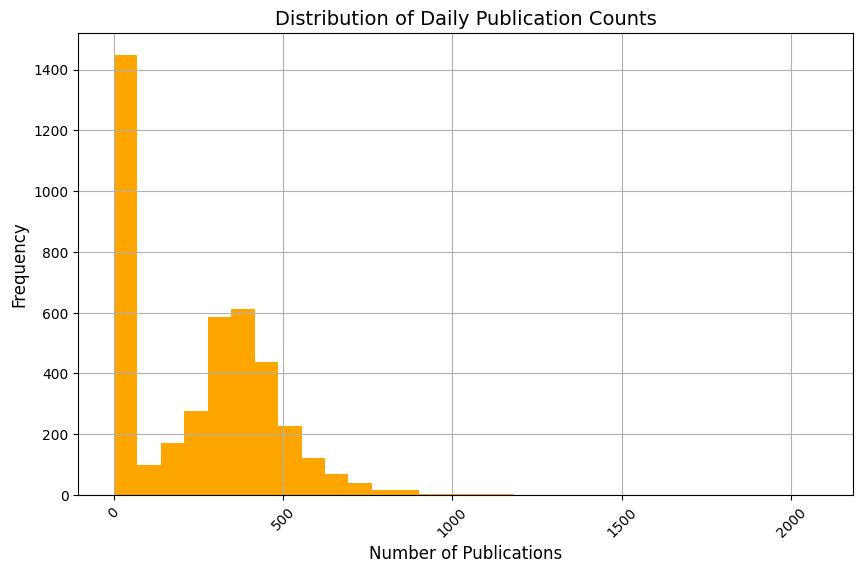

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(daily_counts, bins=30, color='orange')
plt.xlabel('Number of Publications', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Daily Publication Counts', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

In [21]:
peak_threshold = daily_counts.quantile(0.95)  # 95th percentile threshold

peak_days = daily_counts[daily_counts > peak_threshold].index
print("Peak Publication Days:")
print(peak_days)

Peak Publication Days:
DatetimeIndex(['2009-08-10 00:00:00+00:00', '2010-12-16 00:00:00+00:00',
               '2011-01-10 00:00:00+00:00', '2011-01-18 00:00:00+00:00',
               '2011-01-20 00:00:00+00:00', '2011-02-03 00:00:00+00:00',
               '2011-04-26 00:00:00+00:00', '2011-05-04 00:00:00+00:00',
               '2011-05-23 00:00:00+00:00', '2011-07-19 00:00:00+00:00',
               ...
               '2020-05-08 00:00:00+00:00', '2020-05-11 00:00:00+00:00',
               '2020-05-12 00:00:00+00:00', '2020-05-13 00:00:00+00:00',
               '2020-05-14 00:00:00+00:00', '2020-05-18 00:00:00+00:00',
               '2020-05-20 00:00:00+00:00', '2020-05-26 00:00:00+00:00',
               '2020-05-27 00:00:00+00:00', '2020-06-05 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=207, freq=None)


C:\Users\eep\AppData\Local\Temp\ipykernel_22692\4019836559.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = daily_counts.resample('M').sum()


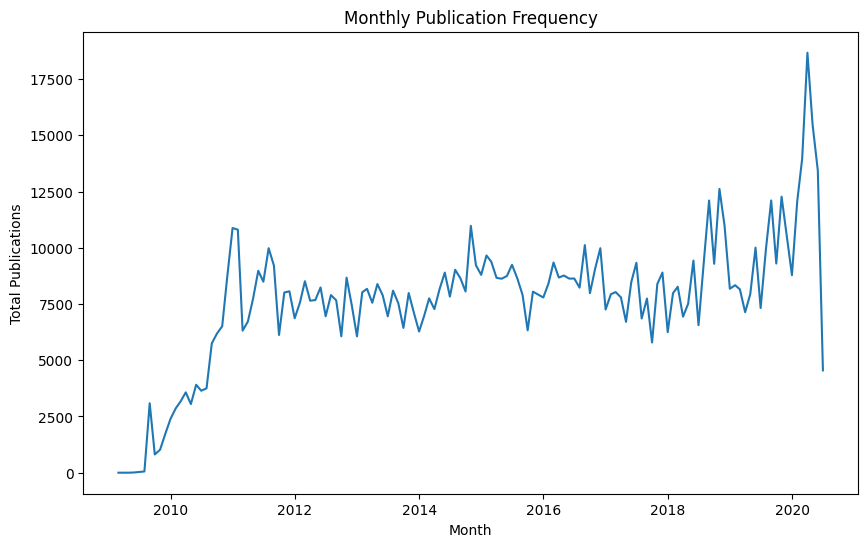

In [22]:
###Seasonal Patterns:
# Resample by month
monthly_counts = daily_counts.resample('M').sum()

# Visualize monthly counts
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts)
plt.xlabel('Month')
plt.ylabel('Total Publications')
plt.title('Monthly Publication Frequency')
plt.show()

                ###Publisher ANalysis

In [23]:
# Publisher Analysis
publisher_counts = data['publisher'].value_counts()
print("Publisher Counts:")
print(publisher_counts)

# Extract email domains (if applicable)
data['publisher_domain'] = data['publisher'].str.extract(r'(\w+@\w+\.\w+)')
domain_counts = data['publisher_domain'].value_counts()
print("Publisher Domain Counts:")
print(domain_counts)

Publisher Counts:
publisher
Paul Quintaro        168435
Lisa Levin           139785
Benzinga Newsdesk    111281
Charles Gross         72892
Monica Gerson         61374
                      ...  
Growth Aces               1
Stock Market Newz         1
Monetarex                 1
Junnan Guo                1
GeoInvesting              1
Name: count, Length: 984, dtype: int64
Publisher Domain Counts:
publisher_domain
luke@benzinga.com                         3877
vishwanath@benzinga.com                   1397
kenwell@benzinga.com                       689
proactive@gmail.com                         86
richa28dhand@gmail.com                       9
Andy@andyswan.com                            4
shivdeep@benzinga.com                        3
aefimoff@benzinga.com                        3
benzingastaffwriter3@benzinga.com            3
andrew@tothetick.com                         2
andrewbeghou@benzinga.com                    2
kiana@investdiva.com                         2
adam@eosdetroit.io 

In [24]:
publisher_counts = data['publisher'].value_counts()

# Identify the most active publishers
top_publishers = publisher_counts.head(10)

print("Top Publishers:")
print(top_publishers)

Top Publishers:
publisher
Paul Quintaro        168435
Lisa Levin           139785
Benzinga Newsdesk    111281
Charles Gross         72892
Monica Gerson         61374
Eddie Staley          42702
Hal Lindon            36445
Juan Lopez            21153
Benzinga Staff        20926
ETF Professor         19812
Name: count, dtype: int64


#Publisher Comparison:

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['headline'])

# Apply LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda_model.fit_transform(tfidf_matrix)

# Assign topics to publishers
data['topic'] = topics.argmax(axis=1)

# Group by publisher and topic
publisher_topic_counts = data.groupby('publisher')['topic'].value_counts()

print("Publisher Topic Distribution:")
print(publisher_topic_counts)

Publisher Topic Distribution:
publisher    topic
AARP         2           4
             1           2
ABNNewswire  0           6
             4           3
             1           2
                      ... 
webmaster    0        6636
             2        3527
             1        2227
             3        1679
             4        1162
Name: count, Length: 2524, dtype: int64


###Correlation with Stock Prices

In [26]:
##Topic Modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Create a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['headline'])

# Apply LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda_model.fit_transform(tfidf_matrix)

# Print the top words for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([tfidf_vectorizer.get_feature_names_out()[i]
                   for i in topic.argsort()[:-5 - 1:-1]]))

Topic 1:
to on pt buy target
Topic 2:
vs est eps reports of
Topic 3:
in stocks the moving session
Topic 4:
week 52 for earnings stocks
Topic 5:
benzinga top for upgrades downgrades


###Text Analysis

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
import pandas as pd

# Text cleaning (optional)
def clean_text(text):
    # Implement your text cleaning logic here (e.g., remove stop words, punctuation)
    return text

# Batch size (adjust as needed)
batch_size = 10000

# Create CountVectorizer with limited features (adjust max_features as needed)
vectorizer = CountVectorizer(max_features=50000)  # Increased max_features

# Initialize word frequencies as an empty sparse matrix
word_frequencies = None

for batch in (data['headline'][i:i+batch_size] for i in range(0, len(data['headline']), batch_size)):
    # Fit and transform the batch
    batch_matrix = vectorizer.fit_transform(batch)

      # Check for dimension mismatch before hstack
    if word_frequencies is not None and word_frequencies.shape[1] != batch_matrix.shape[1]:
        raise ValueError("Mismatched vocabulary size across batches. Consider using a larger max_features parameter or vocabulary pre-selection.")

    # Accumulate sparse matrices across batches using hstack (if dimensions match)
    if word_frequencies is None:
        word_frequencies = batch_matrix
    else:
        word_frequencies = hstack([word_frequencies, batch_matrix])

# Convert to dense array (if needed) and sum for word frequencies
word_frequencies = word_frequencies.toarray().sum(axis=0)

# Convert word frequencies to DataFrame for easier handling
top_keywords = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': word_frequencies}).sort_values(by='frequency', ascending=False).head(30)

print("Top Keywords:")
print(top_keywords)

TypeError: list indices must be integers or slices, not str

In [60]:
print(type(data['headline']))

TypeError: list indices must be integers or slices, not str

In [27]:
import nltk
nltk.download('punkt')  # Download tokenizer
from nltk import pos_tag  
from nltk import ne_chunk

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self-signed certificate (_ssl.c:1000)>


In [55]:
import nltk

nltk.download('punkt')  # Download sentence tokenizer (needed for chunking)
nltk.download('maxent_ne_chunker')  # Download named entity chunker

from nltk import pos_tag  
from nltk import ne_chunk
from nltk import word_tokenize
# Read the data 
with open('D:/Kifya/week1/Data/raw_analyst_ratings.csv/raw_analyst_ratings.csv', 'r', encoding='utf-8') as f:  # Replace 'utf-8' with the appropriate encoding
    data = f.readlines()
# Preprocess the data (e.g., remove extra spaces, handle newlines)
preprocessed_data = [line.strip().split('\t')[0] for line in data]

# Tokenize, tag, and chunk the text for each row
named_entities = []
for text in preprocessed_data:
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    chunked_tokens = ne_chunk(tagged_tokens)

    # Extract named entities and their labels
    for chunk in chunked_tokens:
        if hasattr(chunk, 'label'):
            named_entities.append((chunk.label(), ' '.join(word for word, tag in chunk.leaves())))

# Print extracted named entities
for label, entity in named_entities:
    print(f"Named Entity: {label}\nText: {entity}\n")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\eep\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - 'C:\\Users\\eep/nltk_data'
    - 'd:\\Kifya\\week1\\venv\\nltk_data'
    - 'd:\\Kifya\\week1\\venv\\share\\nltk_data'
    - 'd:\\Kifya\\week1\\venv\\lib\\nltk_data'
    - 'C:\\Users\\eep\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


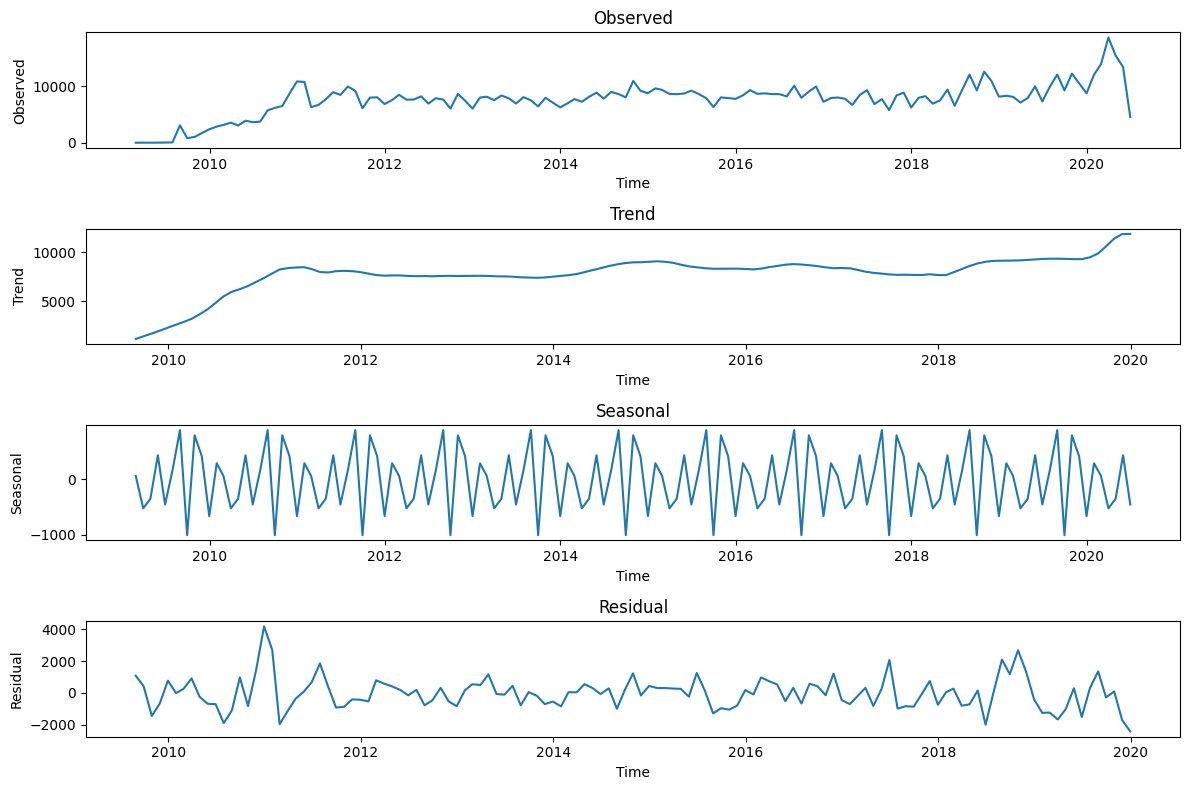

In [29]:
###Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_counts, model='additive')

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.xlabel('Time')
plt.ylabel('Observed')
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.xlabel('Time')
plt.ylabel('Trend')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.xlabel('Time')
plt.ylabel('Seasonal')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.xlabel('Time')
plt.ylabel('Residual')
plt.title('Residual')

plt.tight_layout()
plt.show()

In [30]:
###Irregularity Analysis

# Calculate Z-scores
z_scores = (monthly_counts - monthly_counts.mean()) / monthly_counts.std()

# Identify outliers (e.g., using a threshold of 3)
outliers = monthly_counts[z_scores > 3]

print("Outlier Months:")
print(outliers)

Outlier Months:
date
2020-03-31 00:00:00+00:00    18674
Freq: ME, dtype: int64


In [ ]:
import os

print(os.getcwd()) 